In [17]:
import nasdaqdatalink as ndl
import pandas as pd
from ta import add_all_ta_features
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np


In [18]:
#configurations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [19]:
data_clean = pd.read_csv('../data/data_clean.csv', parse_dates=True)

## Descripción del dataset Inicial - data_clean

In [20]:
len(data_clean)

12721

In [21]:
# Calcula el promedio del sharpe ratio para cada ticker
avg_sharpe_per_ticker = (
    data_clean.groupby('ticker')['sharpe_1y']
    .mean()
    .reset_index()
    .rename(columns={'sharpe_1y': 'avg_sharpe_1y'})
)

avg_sharpe_per_ticker = avg_sharpe_per_ticker.sort_values('avg_sharpe_1y', ascending=False)
print(avg_sharpe_per_ticker)


     ticker  avg_sharpe_1y
78      AR1       2.807187
918    TRGP       2.356058
417    GIC1       2.262809
252    CSE1       2.065479
949     UCM       1.847867
100    AXON       1.766323
187     CEG       1.647676
544    KRFT       1.605973
377    FICO       1.591271
289     DGN       1.541459
813     RYC       1.494966
909   TMC.A       1.465888
199     CGP       1.430356
325    EFU1       1.426065
225     CNG       1.388960
272     CYM       1.366921
799     RNB       1.348444
617     MKG       1.291955
466    HON1       1.289246
394   FSL.B       1.271802
353     ETS       1.254859
38      AJG       1.151176
4      AAPL       1.131360
769    PWJ1       1.115566
782     RAI       1.086808
933     TWC       1.079111
183    CDNS       1.077595
35      AIT       1.068661
568      LO       1.053600
889     TDG       1.010484
83      ASN       0.996413
687    NVDA       0.970718
709    ORLY       0.968973
94     AVGO       0.949464
238     COV       0.946667
584      MA       0.929909
8

In [22]:
print("Shape del dataset:", data_clean.shape)
print("\nPrimeras filas:")
display(data_clean.head())

# Número de tickers y años únicos
n_tickers = data_clean['ticker'].nunique()
years = pd.to_datetime(data_clean['date']).dt.year.unique()
print(f"Número de tickers únicos: {n_tickers}")
print(f"Años cubiertos: {years.min()} - {years.max()} ({len(years)} años)")


Shape del dataset: (12721, 29)

Primeras filas:


,ticker,date,vol_1y,max_1y,min_1y,sma_1y,sma_2y,volatility_1y,revenue,eps,ebitda,netinc,roe,evebitda,fcfps,pb,pe,marketcap,ebit,capex,ncfo,equity,de,closeadj,ret_6m,ret_12m,risk_free_rate,target_12m_final,sharpe_1y
0,A,2001-03-31,847576400.0,74.215,18.250,35.402956,38.759834,0.951615,1.077300e+10,1.68,1.659000e+09,7.570000e+08,0.157,16.505,0.303,5.369,37.341,2.826733e+10,1.164000e+09,-702000000.0,838000000.0,5.265000e+09,0.600,18.694,-0.372073,-0.704513,4.910600,0.137638,0.093033
1,A,2002-03-31,571608700.0,24.576,11.473,17.982242,26.952406,0.582828,8.396000e+09,0.38,8.370000e+08,1.740000e+08,0.031,15.013,-1.546,2.426,78.908,1.373001e+10,1.030000e+08,-594000000.0,-114000000.0,5.659000e+09,0.411,21.267,0.788195,0.137638,5.401900,-0.623877,-1.163115
2,A,2003-03-31,677176600.0,22.222,6.600,11.631502,14.760365,0.656080,6.010000e+09,-2.22,-8.220000e+08,-1.032000e+09,-0.205,-9.383,-1.905,1.817,-8.146,8.406440e+09,-1.557000e+09,-301000000.0,-585000000.0,4.627000e+09,0.773,7.999,0.006797,-0.623877,3.801900,1.405426,2.084207
3,A,2004-03-31,653408900.0,22.806,8.352,15.060278,13.314752,0.349033,6.056000e+09,-4.35,-5.960000e+08,-2.058000e+09,-0.584,-21.898,-0.725,4.783,-6.564,1.350835e+10,-9.580000e+08,-199000000.0,-144000000.0,2.824000e+09,1.230,19.241,0.430558,1.405426,3.840117,-0.298113,-0.964135
4,A,2005-03-31,695043500.0,19.807,11.972,14.791570,14.926191,0.352118,7.181000e+09,0.72,7.320000e+08,3.490000e+08,0.106,14.251,1.174,3.249,33.228,1.159655e+10,4.400000e+08,-96000000.0,663000000.0,3.569000e+09,0.977,13.505,0.029266,-0.298113,4.492800,0.691374,1.835879


Número de tickers únicos: 1042
Años cubiertos: 1999 - 2024 (26 años)


##### Función de Densidad para retornos y sharpe ratios, como se distribuyen?

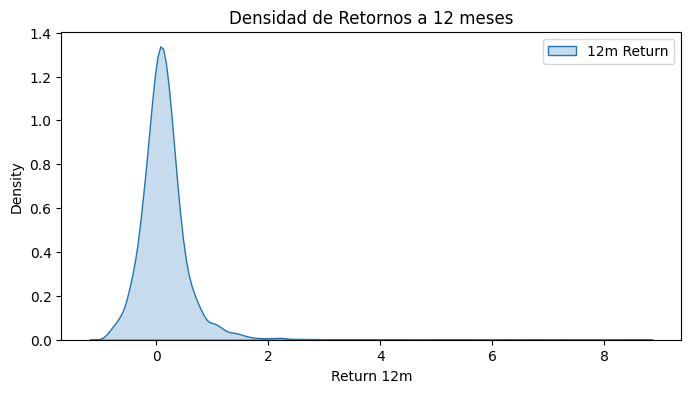

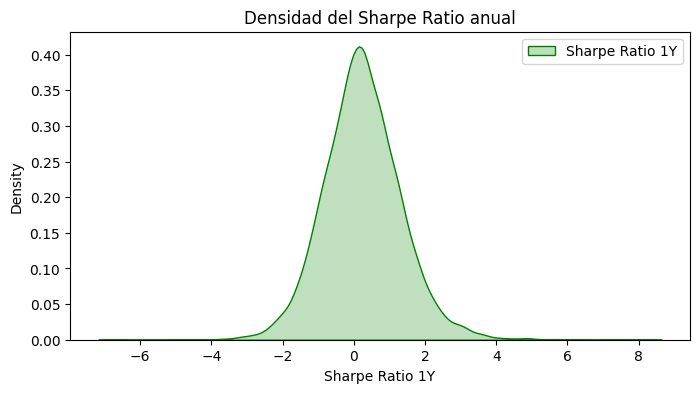

In [23]:

# KDE para retornos (puedes elegir 'ret_12m' o 'ret_6m')
plt.figure(figsize=(8, 4))
sns.kdeplot(data_clean['ret_12m'].dropna(), fill=True, label='12m Return')
plt.title('Densidad de Retornos a 12 meses')
plt.xlabel('Return 12m')
plt.legend()
plt.show()

# KDE para Sharpe ratio anual
plt.figure(figsize=(8, 4))
sns.kdeplot(data_clean['sharpe_1y'].dropna(), fill=True, color='g', label='Sharpe Ratio 1Y')
plt.title('Densidad del Sharpe Ratio anual')
plt.xlabel('Sharpe Ratio 1Y')
plt.legend()
plt.show()


##### Matriz de Correlaciones

Observamos una clara correlación en los datos de precios históricos. Obviamente el precio mínimo máximo y precio a fecha de ventana están altamente correlacionados, además vemos que datos fundamentales están correlacionados, a mayor tamaño de empresa mayor suelen ser ventas, ingresos, capex, net income etc.

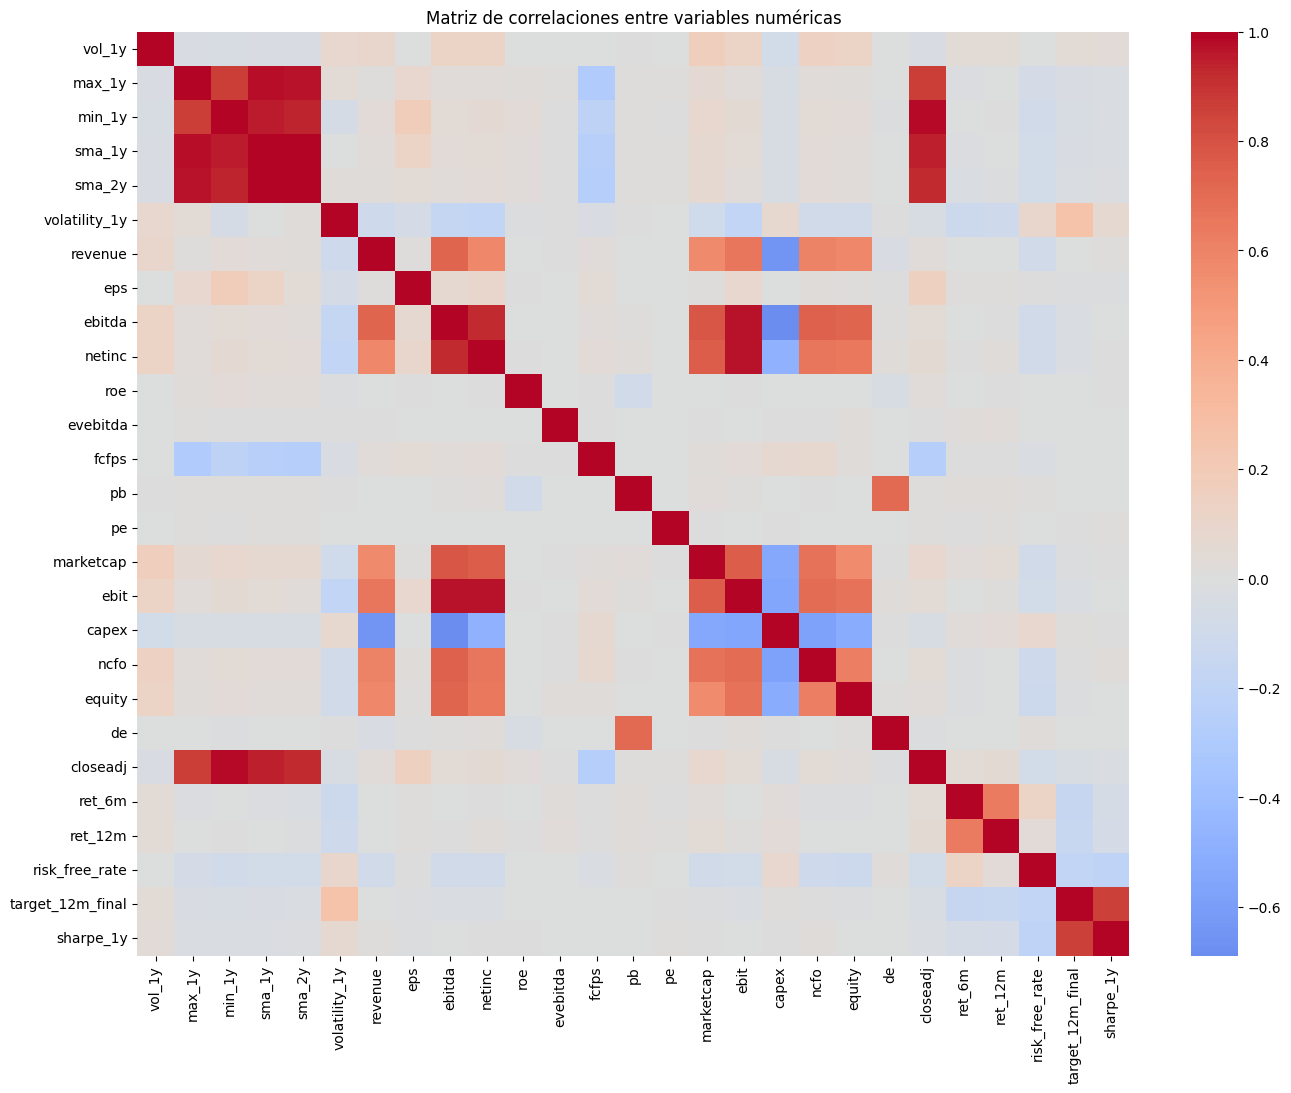

In [24]:
plt.figure(figsize=(16, 12))
corr = data_clean.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de correlaciones entre variables numéricas")
plt.show()


#### Box Plot - Sharpe Ratios
Podemos observar la ciclicidad del mercado representada en la diferencia de sharpe ratio medio a lo largo del tiempo. Además existe una gran cantidad de outliers altamente por encima de la media cuya identificación será el objetivo de estudio de nuestro algoritmo. Incluso en años complicados como 2008 un cierto grupo de empresas consiguió sharpe ratios cercanos a 2

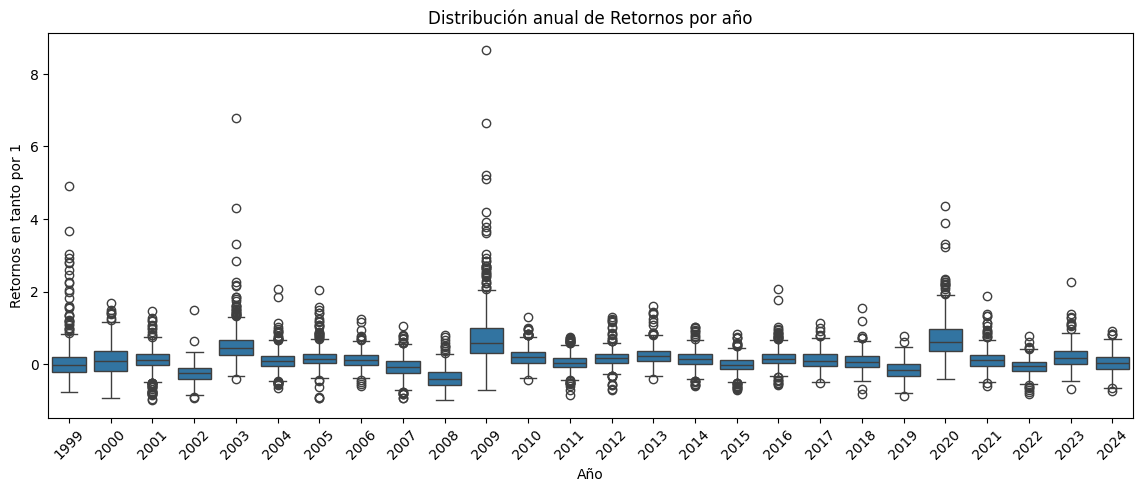

In [27]:
data_clean['year'] = pd.to_datetime(data_clean['date']).dt.year

plt.figure(figsize=(14, 5))
sns.boxplot(x='year', y='target_12m_final', data=data_clean)
plt.title("Distribución anual de Retornos por año")
plt.xlabel("Año")
plt.ylabel("Retornos en tanto por 1")
plt.xticks(rotation=45)
plt.show()


C:\Users\Ignacio\AppData\Local\Temp\ipykernel_28900\1209290291.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sharpe_class', data=df, order=["Underperform", "Normal", "Overperform"], palette='Set2')


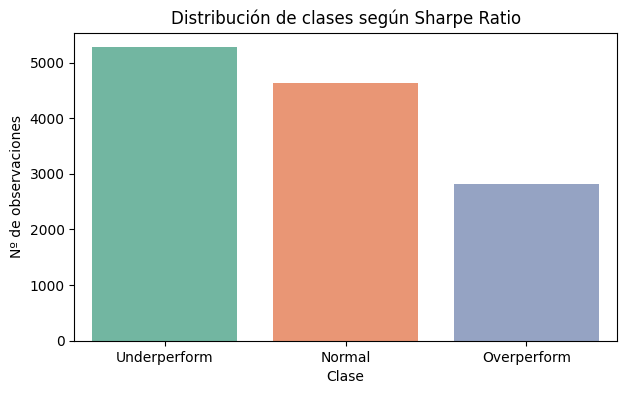

sharpe_class
Underperform    5274
Normal          4633
Overperform     2814
Name: count, dtype: int64

In [33]:
def sharpe_class(sr):
    if sr < 0:
        return "Underperform"
    elif sr < 1:
        return "Normal"
    else:
        return "Overperform"

df = data_clean.copy()
df['sharpe_class'] = data_clean['sharpe_1y'].apply(sharpe_class)

# Gráfica de distribución de clases
plt.figure(figsize=(7,4))
sns.countplot(x='sharpe_class', data=df, order=["Underperform", "Normal", "Overperform"], palette='Set2')
plt.title("Distribución de clases según Sharpe Ratio")
plt.xlabel("Clase")
plt.ylabel("Nº de observaciones")
plt.show()

# Tabla resumen
display(df['sharpe_class'].value_counts())



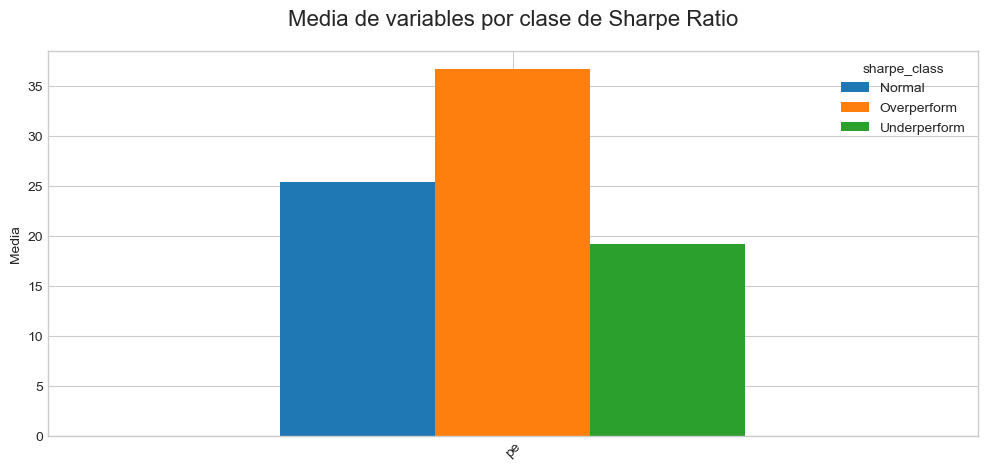

In [83]:
mean_by_class = data_clean.groupby('sharpe_class')[['pe']].mean()

mean_by_class.T.plot(kind='bar', figsize=(12,5))
plt.title("Media de variables por clase de Sharpe Ratio")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.show()


C:\Users\Ignacio\AppData\Local\Temp\ipykernel_28900\3037187076.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='return_class', data=df, order=["Underperform", "Normal", "Overperform"], palette='Set1')


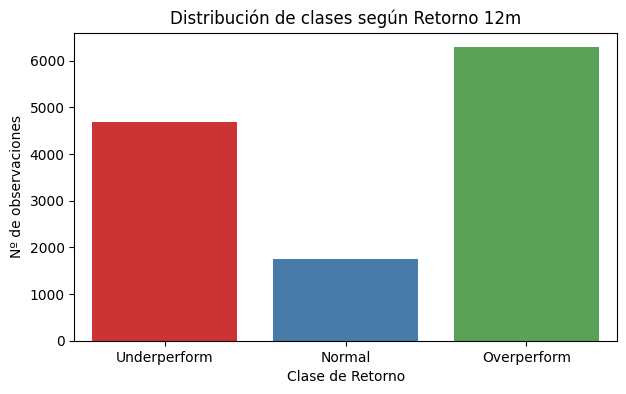

return_class
Overperform     6288
Underperform    4685
Normal          1748
Name: count, dtype: int64

In [36]:
def return_class(ret):
    if ret < 0:
        return "Underperform"
    elif ret < 0.1:
        return "Normal"
    else:
        return "Overperform"

df = data_clean.copy()
df['return_class'] = data_clean['ret_12m'].apply(return_class)
plt.figure(figsize=(7,4))
sns.countplot(x='return_class', data=df, order=["Underperform", "Normal", "Overperform"], palette='Set1')
plt.title("Distribución de clases según Retorno 12m")
plt.xlabel("Clase de Retorno")
plt.ylabel("Nº de observaciones")
plt.show()

# Tabla resumen
display(df['return_class'].value_counts())



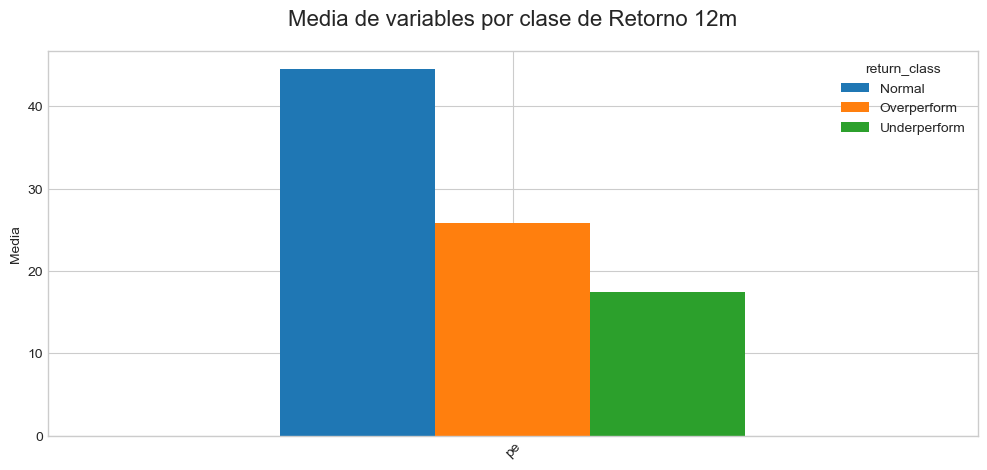

In [87]:
mean_by_return_class = data_clean.groupby('return_class')[['pe']].mean()

mean_by_return_class.T.plot(kind='bar', figsize=(12,5))
plt.title("Media de variables por clase de Retorno 12m")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.show()
